### Resultados simulaciones

Se revisan los resultados de las simulaciones con la red GRG (Graph Random Growth) con conectividades .1, .2, ..., .9, 1. También se realizó el ejercicio con cuatro números de agente: 10, 11, 100 y 101.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos de las simulaciones con Numero_agentes:

In [2]:
Numero_agentes = 100

In [54]:
names=['Identificador','Parametro-0','Parametro-1','Agente','Ronda','Estado','Puntaje','Politica_lag','Politica','Consistencia']
df_list = []
#conectividades = [0.1 * x for x in range(1, 11)]
conectividades = [0.02 * x for x in range(0, 5)] 
#conectividades = [0.02 * x for x in range(0, 5)] + [0.1 * x for x in range(1, 11)]
#conectividades = [round(x, 2) for x in conectividades]
#conectividades = [0.0, 0.5, 1]
#conectividades = [1]
print("Leyendo datos sweep conectividad:", conectividades)
for p in conectividades:
    archivo = "./data/simulaciones-GRG-" + str(Numero_agentes)  + "-" + str(p) + ".csv"
    print("Cargando datos de archivo", archivo, "...")
    try:
        aux = pd.read_csv(archivo, names=names, header=None)
        aux['Parametro-1'] = p
        df_list.append(aux)
        print("Listo")
    except:
        print("Archivo no existe! Saltando a siguiente opción")
        
data = pd.concat(df_list)
data = data.iloc[1:]
data.head()

Leyendo datos sweep conectividad: [0.0, 0.02, 0.04, 0.06, 0.08]
Cargando datos de archivo ./data/simulaciones-GRG-100-0.0.csv ...


/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Listo
Cargando datos de archivo ./data/simulaciones-GRG-100-0.02.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-100-0.04.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-100-0.06.csv ...
Listo
Cargando datos de archivo ./data/simulaciones-GRG-100-0.08.csv ...
Listo


,Identificador,Parametro-0,Parametro-1,Agente,Ronda,Estado,Puntaje,Politica_lag,Politica,Consistencia
1,0,100,0.0,0,0,1,-1,NaN,4,NaN
2,0,100,0.0,0,1,0,0,4.0,4,1.0
3,0,100,0.0,0,2,1,1,4.0,4,1.0
4,0,100,0.0,0,3,0,0,4.0,4,1.0
5,0,100,0.0,0,4,1,1,4.0,4,1.0


In [55]:
data = data.dropna()
data['Agente'] = data['Agente'].astype(int)
data['Ronda'] = data['Ronda'].astype(int)
data['Estado'] = data['Estado'].astype(int)
data['Politica'] = data['Politica'].astype(int)
data['Politica_lag'] = data['Politica_lag'].apply(lambda x: int(round(float(x), 0)))
data['Puntaje'] = data['Puntaje'].astype(int)
data.head()

,Identificador,Parametro-0,Parametro-1,Agente,Ronda,Estado,Puntaje,Politica_lag,Politica,Consistencia
2,0,100,0.0,0,1,0,0,4,4,1.0
3,0,100,0.0,0,2,1,1,4,4,1.0
4,0,100,0.0,0,3,0,0,4,4,1.0
5,0,100,0.0,0,4,1,1,4,4,1.0
6,0,100,0.0,0,5,0,0,4,4,1.0


### Verificamos correctitud de los datos

In [56]:
data.shape

(4950000, 10)

In [57]:
data['Parametro-1'].value_counts()

0.04    990000
0.08    990000
0.02    990000
0.06    990000
0.00    990000
Name: Parametro-1, dtype: int64

In [58]:
data['Agente'].value_counts()

99    49500
36    49500
26    49500
27    49500
28    49500
      ...  
69    49500
70    49500
71    49500
72    49500
0     49500
Name: Agente, Length: 100, dtype: int64

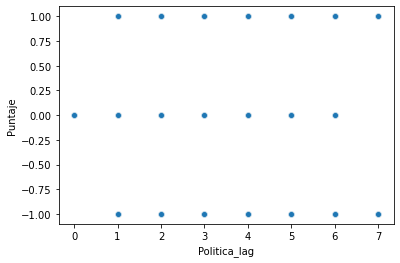

In [59]:
sns.scatterplot(x=data['Politica_lag'], y=data['Puntaje'], alpha=0.5)

**Asistencia**

Text(0, 0.5, 'Promedio asistencia ultimas rondas\nsobre 100 simulaciones')

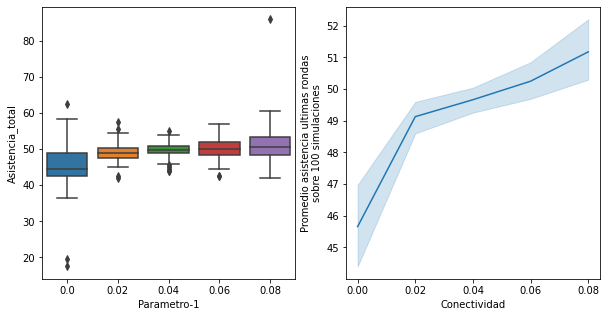

In [60]:
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

aux['Asistencia_total'] = (aux['Asistencia_total']/Numero_agentes)*100 
rondas = aux['Ronda'].unique()
aux = aux[aux['Ronda'] > rondas[-5]]
aux = aux.groupby(['Parametro-1', 'Identificador'])['Asistencia_total']\
    .mean().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Asistencia_total']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=aux['Parametro-1'], y=aux['Asistencia_total'], ax=ax[0])
sns.lineplot(x=aux['Parametro-1'], y=aux['Asistencia_total'], ax=ax[1])
plt.xlabel('Conectividad')
plt.ylabel('Promedio asistencia ultimas rondas\nsobre 100 simulaciones')

#### Asistencia óptima

Text(0, 0.5, 'Promedio asistencia óptima\nsobre 100 simulaciones')

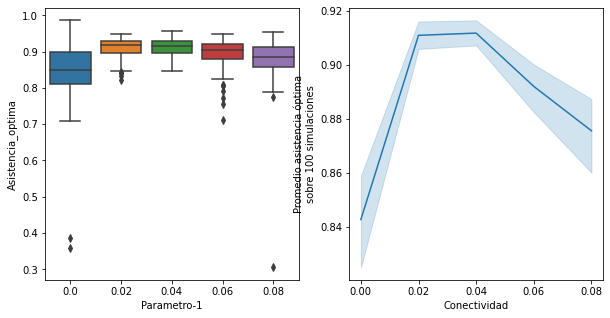

In [67]:
aux = data.groupby(['Parametro-1', 'Identificador', 'Ronda'])['Estado']\
    .sum().reset_index()
aux.columns = ['Parametro-1',
               'Identificador',
               'Ronda', 
               'Asistencia_total']

# Proporción de asistencia
aux['Asistencia'] = aux['Asistencia_total']/Numero_agentes
# Distancia al cuadrado entre proporción de asistencia y 0.5
aux['diferencia_con_umbral'] = (aux['Asistencia'] - 0.5)*(aux['Asistencia'] - 0.5)
num_rondas = aux.Ronda.max() + 1
df = aux.groupby(['Parametro-1', 'Identificador'])['diferencia_con_umbral'].sum().reset_index()
df['Asistencia_optima'] = df['diferencia_con_umbral']/num_rondas
df['Asistencia_optima'] = 1 - 2 * np.sqrt(df['Asistencia_optima'])
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[0])
sns.lineplot(x=df['Parametro-1'], y=df['Asistencia_optima'], ax=ax[1])
plt.xlabel('Conectividad')
plt.ylabel('Promedio asistencia óptima\nsobre 100 simulaciones')

#### Recompensa total

In [68]:
data_aux = data.copy()
data_aux['Puntaje normalizado'] = data_aux['Puntaje'] + 1
data_aux = data_aux.groupby(['Parametro-1', 'Identificador', 'Agente'])['Puntaje normalizado'].mean().reset_index()
data_aux = data_aux.groupby(['Parametro-1', 'Identificador'])['Puntaje normalizado'].mean().reset_index()
data_aux.head()

,Parametro-1,Identificador,Puntaje normalizado
0,0.0,6,1.423120
1,0.0,7,1.428485
2,0.0,8,1.450303
3,0.0,9,1.093232
4,0.0,10,1.415354


Text(0, 0.5, 'Puntaje NORMALIZADO promedio\n sobre 100 simulaciones')

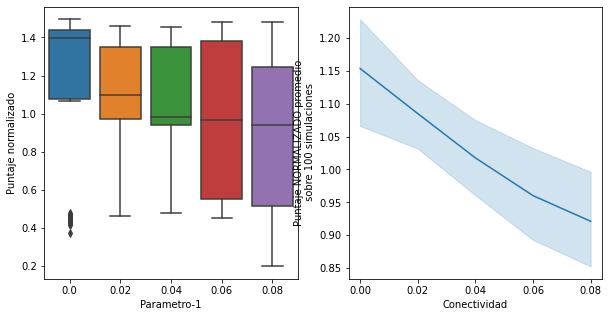

In [71]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[0]
#    hue=data_aux['Tipo_red']
)
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Puntaje normalizado'],
    ax=ax[1]
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Conectividad')
plt.ylabel('Puntaje NORMALIZADO promedio\n sobre 100 simulaciones')

#### Distribución de la recompensa

In [75]:
def gini1(x):
    x = np.asarray(x) 
    sorted_x = np.sort(x) 
    n = len(x) 
    cumx = np.cumsum(sorted_x, dtype=float)
    try:
        gini = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
    except:
        gini = 100
    return np.round(gini,3)

In [77]:
data_aux['Puntaje normalizado'].astype(float)
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
data_aux.head()

,Parametro-1,Identificador,Puntaje normalizado,Gini
0,0.0,6,1.423120,0.0
1,0.0,7,1.428485,0.0
2,0.0,8,1.450303,0.0
3,0.0,9,1.093232,0.0
4,0.0,10,1.415354,0.0


Text(0, 0.5, 'Índice de Gini')

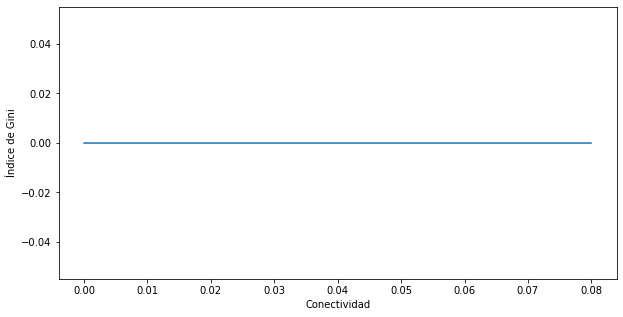

In [78]:
data_aux['Gini'] = data_aux.groupby(['Parametro-1','Identificador'])['Puntaje normalizado'].transform(func = gini1)
fig = plt.subplots(figsize=(10,5))
sns.lineplot(
    x=data_aux['Parametro-1'], 
    y=data_aux['Gini'],
#    hue=data_aux['Tipo_red']
)
plt.xlabel('Conectividad')
plt.ylabel('Índice de Gini')

**Uso de políticas**

In [82]:
df = pd.DataFrame(data.groupby(['Parametro-1', 'Identificador', 'Ronda','Politica'])['Agente'].count()).reset_index()
df.columns = ['Parametro-1', 'Identificador', 'Ronda','Politica_lag', 'cantidad_agentes']
df = df.groupby(['Parametro-1', 'Ronda','Politica_lag'])['cantidad_agentes'].mean().reset_index()
df.head(2)

,Parametro-1,Ronda,Politica_lag,cantidad_agentes
0,0.0,1,0,12.782178
1,0.0,1,1,12.247525


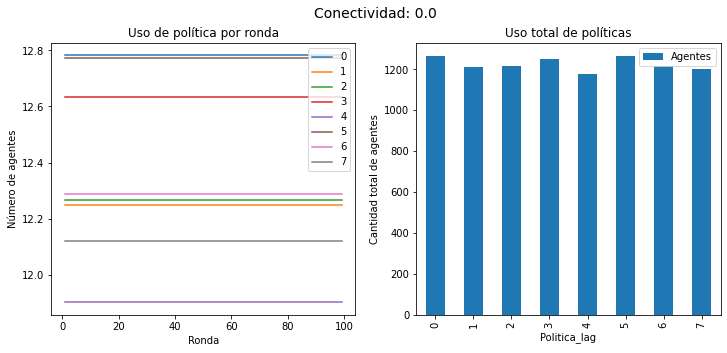

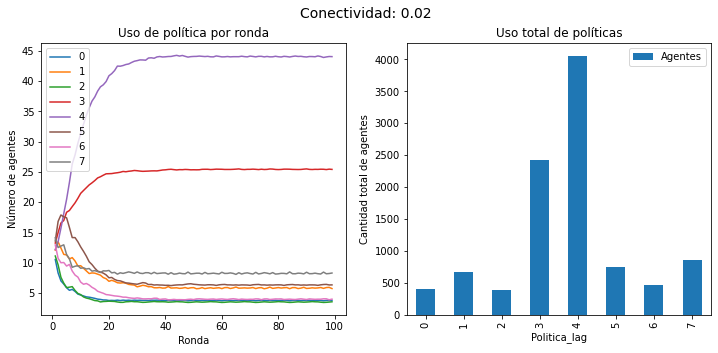

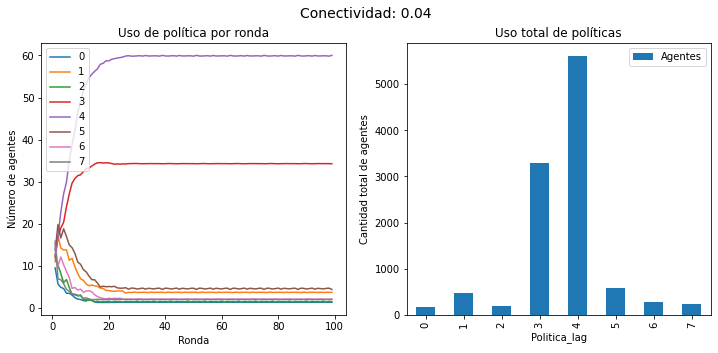

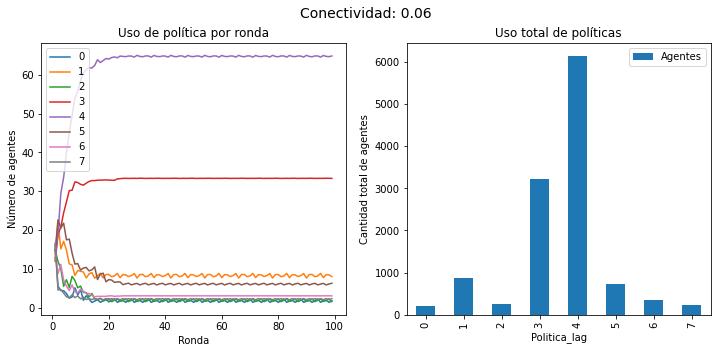

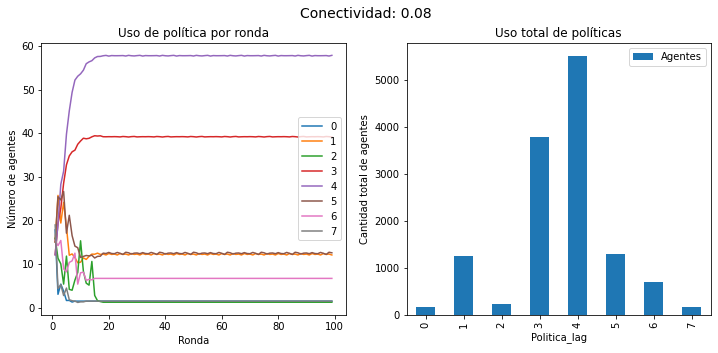

In [83]:
#sns.set_palette("Paired")
for r, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #sns.lineplot(
    #            x=grp['Ronda'], 
    #            y=grp['cantidad_agentes'],
    #            hue=grp['Politica'],
    #            ax=ax[0]
    #        )
    for label, group in grp.groupby('Politica_lag'):
        group.plot(x='Ronda', y='cantidad_agentes', ax=ax[0],label=label)
    #ax[0].set_ylim([0,Num_agentes+1])
    ax[0].set_title('Uso de política por ronda')
    ax[0].set_ylabel('Número de agentes')
    df1 = pd.DataFrame(grp.groupby('Politica_lag')['cantidad_agentes'].sum())
    df1.columns = ['Agentes']
    #ax[1].plot(df.index, df['Agentes'])
    df1.plot(kind="bar", ax = ax[1])
    ax[1].set_title('Uso total de políticas')
    ax[1].set_ylabel('Cantidad total de agentes')
    fig.suptitle('Conectividad: ' + str(r), fontsize=14)

In [84]:
df = data.groupby(['Parametro-1', 'Politica_lag', 'Identificador'])['Puntaje'].mean().reset_index()
df.head()

,Parametro-1,Politica_lag,Identificador,Puntaje
0,0.0,0,6,0.0
1,0.0,0,7,0.0
2,0.0,0,8,0.0
3,0.0,0,9,0.0
4,0.0,0,10,0.0


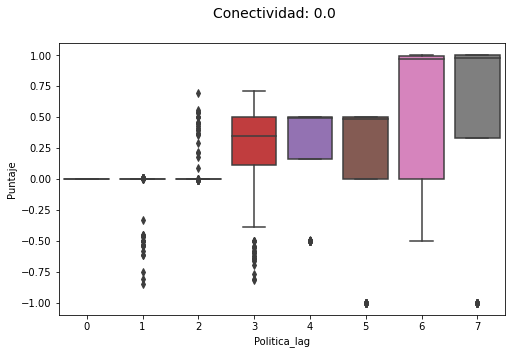

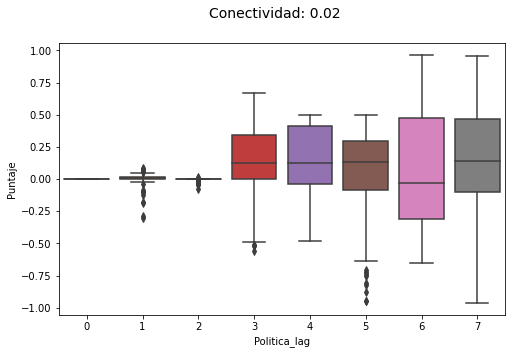

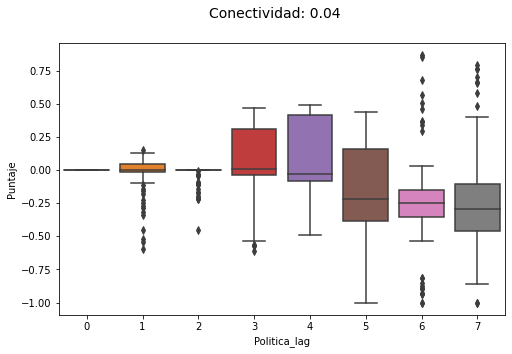

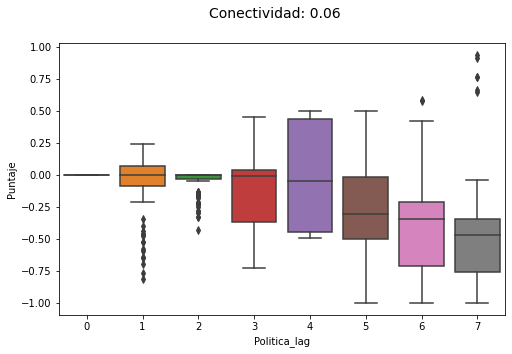

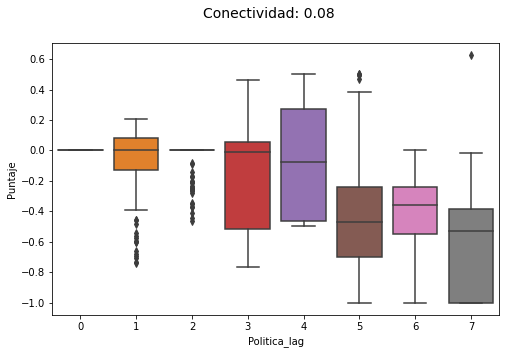

In [85]:
for p, grp in df.groupby('Parametro-1'):
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    sns.boxplot(x=grp['Politica_lag'], y=grp['Puntaje'])
    fig.suptitle('Conectividad: ' + str(p), fontsize=14)

1. La conectividad influye en el comportamiento del sistema
* 
